In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import project3_utilities as p3utils

#tesla_stock_data = p3utils.get_yahoo_finance_data("TSLA")
#print(tesla_stock_data)

# Load the data
tesla_df = pd.read_csv('Data/TSLA.csv')

# Convert the Date column to datetime format
tesla_df["Date"] = pd.to_datetime(tesla_df["Date"])

In [2]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=32))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Get the predictions
predictions = p3utils.get_LSTM_predictions(tesla_df, 0.8, model, window_size=100)

2732/2732 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 0.0017
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/Users/brandon/OSU/challenges/OSU_AI_Project3/project3_utilities.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Predictions'] = predictions


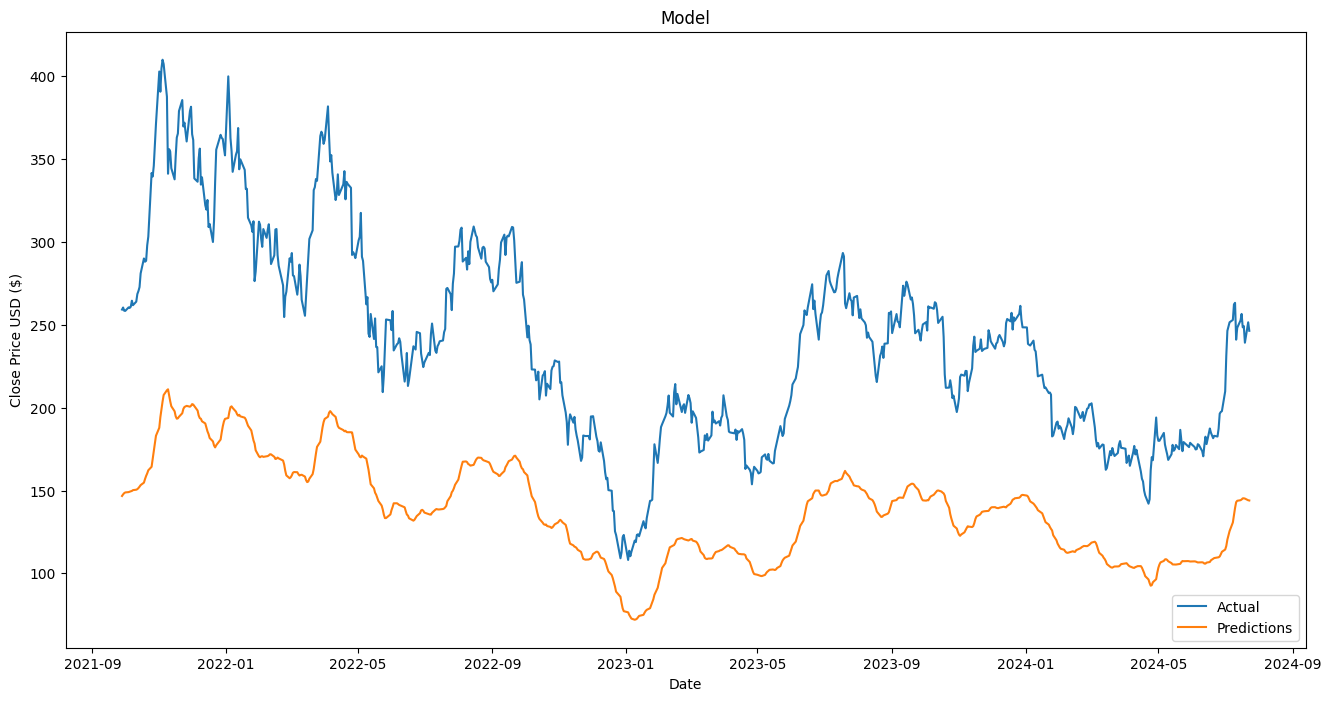

In [4]:
# Plot the predictions
p3utils.plot_predictions(tesla_df, 0.8, predictions, False).show()

In [5]:
# Now we need to determine if we buy or sell
tesla_df = p3utils.generate_buy_sell(tesla_df, predictions)
tesla_df[["Date", "Open", "Buy_Sell", "Close"]].tail(10)

,Date,Open,Buy_Sell,Close
3530,2024-07-10,262.799988,BUY,263.260010
3531,2024-07-11,263.299988,SELL,241.029999
3532,2024-07-12,235.800003,BUY,248.229996
3533,2024-07-15,255.970001,BUY,252.639999
3534,2024-07-16,255.309998,BUY,256.559998
3535,2024-07-17,252.729996,SELL,248.500000
3536,2024-07-18,251.089996,BUY,249.229996
3537,2024-07-19,247.789993,SELL,239.199997
3538,2024-07-22,244.210007,BUY,251.509995
3539,2024-07-23,253.449997,SELL,246.380005


In [8]:
# Now test if the model worked:
(tesla_df, profit_total) = p3utils.score_the_model(tesla_df)

display(tesla_df.tail(10))
print(f"Using this model, we would have made ${profit_total} by following the BUY instruction.")

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions,Buy_Sell,Profit
3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400,139.445618,BUY,0.460022
3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,241.029999,221707300,142.970078,SELL,0.000000
3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,248.229996,155955800,143.81282,BUY,12.429993
3533,2024-07-15,255.970001,265.600006,251.729996,252.639999,252.639999,146912900,144.147186,BUY,-3.330002
3534,2024-07-16,255.309998,258.619995,245.800003,256.559998,256.559998,126332500,144.570862,BUY,1.250000
3535,2024-07-17,252.729996,258.470001,246.179993,248.500000,248.500000,115584800,145.268616,SELL,0.000000
3536,2024-07-18,251.089996,257.140015,247.199997,249.229996,249.229996,110869000,145.289032,BUY,-1.860000
3537,2024-07-19,247.789993,249.440002,236.830002,239.199997,239.199997,87403900,145.135696,SELL,0.000000
3538,2024-07-22,244.210007,253.210007,243.750000,251.509995,251.509995,101225400,144.119278,BUY,7.299988
3539,2024-07-23,253.449997,255.759399,245.630005,246.380005,246.380005,94589990,143.981094,SELL,0.000000


Using this model, we would have made $2551.598222999999 by following the BUY instruction.
